##### Homework #2
##### Nazmul Rabbi
##### 10/02/2024

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv('laptops.csv')

# print the first few rows of the dataframe
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [3]:
# normalize the column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# see the normalized column names
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
# select the columns that we want to keep and create a new dataframe
new_df = df.loc[:, ['ram', 'storage', 'screen', 'final_price']]

# print the first few rows of the new dataframe
new_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

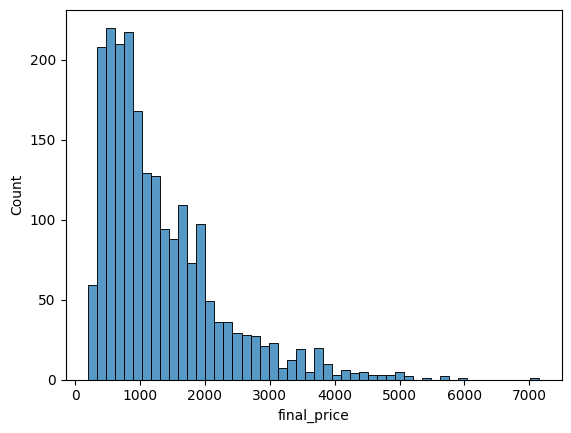

In [5]:
# plot the distribution of the final_price variable
sns.histplot(new_df.final_price, bins=50)

In [6]:
print('Yes, the final_price variable has a long tail distribution')

Yes, the final_price variable has a long tail distribution


In [7]:
# calculate the number of missing values in each column
new_df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [8]:
print('Q1: The screen variable is the only column with missing values')

Q1: The screen variable is the only column with missing values


In [9]:
print("Q2: The median value of variable ram is", int(new_df.ram.median()))

Q2: The median value of variable ram is 16


In [10]:
# Total number of data points
n = len(df)

# Calculate sizes for validation, test, and training sets
n_val = int(n * 0.2)  # 20% for validation
n_test = int(n * 0.2)  # 20% for test

# Ensure that the remaining data is used for training (approximately 60%)
n_train = n - n_val - n_test  # Remaining 60% for training

# generate a random index
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
# split the data into train, validation, and test sets
df_train = new_df.iloc[idx[:n_train]]
df_val = new_df.iloc[idx[n_train:n_train+n_val]]
df_test = new_df.iloc[idx[n_train+n_val:]]

In [12]:
# check length of data
len(new_df), len(df_train), len(df_val), len(df_test), len(df_val+df_test+df_train)

(2160, 1296, 432, 432, 2160)

In [13]:
# reset the index of the dataframes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# see the first few rows of the training set
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [15]:
# create the target variable
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [16]:
# remove the target variable from the dataframes
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [17]:
# see the first few rows of the training set
df_train.head()

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1
2,32,1000,14.0
3,16,512,13.3
4,32,1000,16.0


In [18]:
def prepare_X(df):
    df_num = df
    df_num = df_num.fillna(0)
    #df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [19]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print("RMSE:", round(rmse(y_val, y_pred),2))

RMSE: 0.43


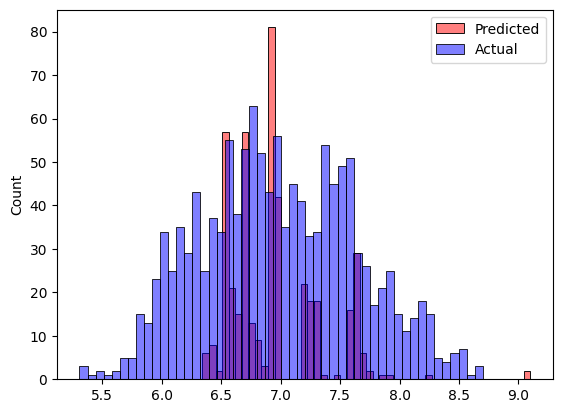

In [20]:
# Plot the histograms with labels
sns.histplot(y_pred, color='red', alpha=0.5, bins=50, label='Predicted')
sns.histplot(y_train, color='blue', alpha=0.5, bins=50, label='Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [21]:
print("Q3: Both are equally good")

Q3: Both are equally good


In [22]:
# check for missing values
print(df_train.isnull().sum(), "\n")
print(df_test.isnull().sum(), "\n")
print(df_val.isnull().sum())

ram        0
storage    0
screen     3
dtype: int64 

ram        0
storage    0
screen     0
dtype: int64 

ram        0
storage    0
screen     1
dtype: int64


In [23]:
# fill missing values with 0
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)
X_test = df_test.fillna(0)

In [24]:
# check for missing values after filling
print(X_train.isnull().sum(), "\n")
print(X_val.isnull().sum(), "\n")
print(X_test.isnull().sum())

ram        0
storage    0
screen     0
dtype: int64 

ram        0
storage    0
screen     0
dtype: int64 

ram        0
storage    0
screen     0
dtype: int64


In [25]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [26]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:      
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)    
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, round(score, 2))

0 0.43
0.01 0.43
0.1 0.43
1 0.43
5 0.46
10 0.51
100 0.67


In [27]:
print("Q4: The model performs best with r=0")

Q4: The model performs best with r=0


In [28]:
# Prepare to store RMSE scores
rmse_scores = []

# Loop through each seed, shuffle data, and compute RMSE
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Split the data into training, validation, and test sets
    df_train = new_df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = new_df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = new_df.iloc[idx[n_train+n_val:]].reset_index(drop=True)
    
    # Create the target variable (using original target variable, not log-transformed)
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    
    # Use the pre-filled data, drop target variable and fill missing values with 0
    X_train = df_train.drop('final_price', axis=1).fillna(0).values  
    X_val = df_val.drop('final_price', axis=1).fillna(0).values

    # Train the linear regression model without regularization
    w0, w = train_linear_regression(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = w0 + X_val.dot(w)
    
    # Calculate RMSE using original prices
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f"Seed: {seed}, RMSE: {score}")

# Compute the standard deviation of the RMSE scores
std_dev = np.std(rmse_scores)
print(f"Standard deviation of RMSE scores: {round(std_dev, 3)}")

Seed: 0, RMSE: 565.4520868771027
Seed: 1, RMSE: 636.7985423056726
Seed: 2, RMSE: 588.9558697907962
Seed: 3, RMSE: 597.8148920012521
Seed: 4, RMSE: 571.962791511102
Seed: 5, RMSE: 573.2383256618949
Seed: 6, RMSE: 647.3438328407208
Seed: 7, RMSE: 550.4398184485952
Seed: 8, RMSE: 587.333503616991
Seed: 9, RMSE: 576.1017929433108
Standard deviation of RMSE scores: 29.176


In [29]:
print("Q5: The value of standard deviation is 29.176")

Q5: The value of standard deviation is 29.176


In [30]:
# Set the seed value
seed = 9
np.random.seed(seed)

# Shuffle the indices based on seed
idx = np.arange(n)
np.random.shuffle(idx)

# Split the data into training, validation, and test sets
df_train = new_df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = new_df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = new_df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

# Combine training and validation sets
df_train_full = pd.concat([df_train, df_val]).reset_index(drop=True)

# Create the target variable for the combined training set and test set (using original target variable)
y_train_full = df_train_full['final_price'].values
y_test = df_test['final_price'].values

# Use the pre-filled data, drop target variable and fill missing values with 0
X_train_full = df_train_full.drop('final_price', axis=1).fillna(0).values  
X_test = df_test.drop('final_price', axis=1).fillna(0).values

# Train the linear regression model with regularization (r = 0.001)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Make predictions on the test set
y_pred = w0 + X_test.dot(w)

# Calculate RMSE using original prices
test_rmse = rmse(y_test, y_pred)
print(f"Seed: {seed}, RMSE: {test_rmse}")

Seed: 9, RMSE: 608.609982204956


In [31]:
print('Q6: The RMSE on the test dataset is 608.60')

Q6: The RMSE on the test dataset is 608.60
